# Промежуточная аттестация по сетям искусcтвенных нейронов.
## Задание

**Ваша задача - создать классификатор изображений с помощью Keras и сверточных нейронных сетей для набора данных Fashion MNIST. Этот набор данных включает 10 меток с разными типами одежды с изображениями 28 на 28 * в оттенках серого *. Имеется обучающий набор из 60 000 изображений и 10 000 тестовых изображений.**

Описание классов

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## Данные

**Загружаем данные**

In [218]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Визаулизация датасета

**Используйте matplotlib чтобы показать пример картинки.**

In [219]:
import matplotlib.pyplot as plt


In [220]:
index = 0

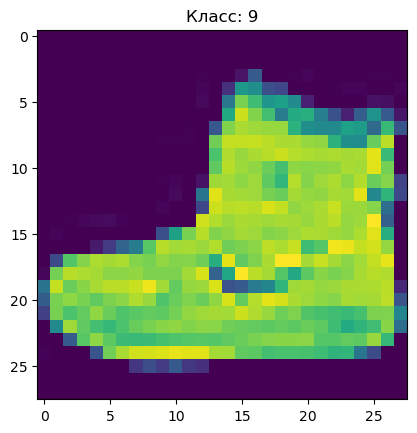

In [221]:
plt.imshow(x_train[index], cmap='viridis')
plt.title(f"Класс: {y_train[index]}")
plt.show()

## Предобработка

**Нормализуйте данные X_train и X_test **

In [222]:
import numpy as np

In [223]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0


**Измените форму массивов X_train и X_test так, чтобы они стали 4-мерными**
batch_size x channels x H x W

In [224]:
x_train_normalized = x_train_normalized.reshape(-1, 1, 28, 28)
x_test_normalized = x_test_normalized.reshape(-1, 1, 28, 28)


In [225]:
print(x_train_normalized.shape)
print(x_test_normalized.shape) 

(60000, 1, 28, 28)
(10000, 1, 28, 28)


**Преобразуйте  y_train и y_test в one_hot представления **

In [226]:
from tensorflow.keras.utils import to_categorical

In [227]:
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

In [228]:
print(y_train_one_hot.shape)
print(y_test_one_hot.shape)  

(60000, 10)
(10000, 10)


## Создайте модель

**Примерная структура модели. При выполнении задания вы можете поэкспериментировать со слоями**

* Сверточный слой, 32 фильтра, размер ядра=(4,4)
* Пулинг с pool_size = (2,2)

* Выпрямляющий слой (Flatten)
* Полносвязный слой (например 128 нейронов), RELU 

* Выходной полносвязный слой с 10 нейронами с softmax 

**При компиляции укажите loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [229]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [230]:
model = models.Sequential()
model.add(layers.Conv2D(32, (4, 4), activation='relu', input_shape=(1, 28, 28), padding='same'))

model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [231]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 1, 28, 32)         14368     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 1, 14, 32)         0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 448)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               57472     
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                                 
Total params: 73130 (285.66 KB)
Trainable params: 73130 (285.66 KB)
Non-trainable params: 0 (0.00 Byte)
_______________

# Тренировка модели
**Тренируем модель на x_train. Число эпох выберите самостоятельно**

In [232]:
epochs = 10
batch_size = 64
history = model.fit(x_train_normalized, y_train_one_hot, epochs=epochs, batch_size=batch_size, validation_split=0.2)


Epoch 1/10
750/750 [==============================] - 3s 4ms/step - loss: 0.5429 - accuracy: 0.8066 - val_loss: 0.4159 - val_accuracy: 0.8533
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3728 - accuracy: 0.8653 - val_loss: 0.3661 - val_accuracy: 0.8705
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3283 - accuracy: 0.8804 - val_loss: 0.3330 - val_accuracy: 0.8822
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2999 - accuracy: 0.8897 - val_loss: 0.3178 - val_accuracy: 0.8867
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2825 - accuracy: 0.8964 - val_loss: 0.3194 - val_accuracy: 0.8881
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2664 - accuracy: 0.9026 - val_loss: 0.3124 - val_accuracy: 0.8883
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2518 - accuracy: 0.9063 - val_loss: 0.3067 - val_accuracy: 0.8890
Epoch 

### Оценка модели

**Оцените модель по метрикам accuracy,precision,recall,f1-score на тестовой выборке x_test **

In [233]:
from sklearn.metrics import classification_report

In [234]:
y_pred = model.predict(x_test_normalized)

313/313 [==============================] - 0s 1ms/step


In [235]:
predictions = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test_one_hot, axis=1)

In [236]:
report = classification_report(y_test,predictions) 

In [237]:
print(report)

              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1000
           1       0.98      0.97      0.98      1000
           2       0.82      0.80      0.81      1000
           3       0.90      0.91      0.90      1000
           4       0.82      0.84      0.83      1000
           5       0.95      0.98      0.97      1000
           6       0.66      0.77      0.71      1000
           7       0.97      0.92      0.94      1000
           8       0.98      0.96      0.97      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



## Дополнительно
 
* Отрисуйте фильтры на слое Conv2D, сравните до и после обучения модели

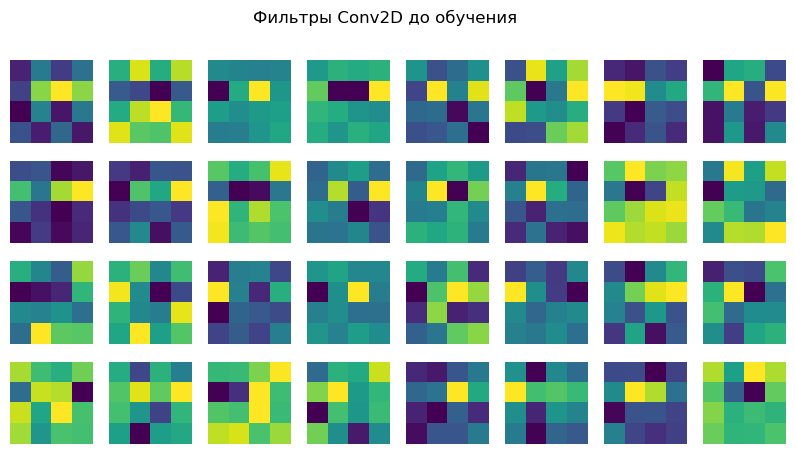

In [238]:
conv_layer = model.layers[0]
weights_before_training = conv_layer.get_weights()[0]


plt.figure(figsize=(10, 5))
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(weights_before_training[:, :, 0, i], cmap='viridis')
    plt.axis('off')
plt.suptitle('Фильтры Conv2D до обучения')
plt.show()

In [239]:
epochs = 30
batch_size = 64
history = model.fit(x_train_normalized, y_train_one_hot, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 3s 4ms/step - loss: 0.2095 - accuracy: 0.9238 - val_loss: 0.3092 - val_accuracy: 0.8937
Epoch 2/30
750/750 [==============================] - 3s 4ms/step - loss: 0.2017 - accuracy: 0.9255 - val_loss: 0.3057 - val_accuracy: 0.8989
Epoch 3/30
750/750 [==============================] - 3s 4ms/step - loss: 0.1922 - accuracy: 0.9284 - val_loss: 0.3018 - val_accuracy: 0.8977
Epoch 4/30
750/750 [==============================] - 3s 4ms/step - loss: 0.1851 - accuracy: 0.9317 - val_loss: 0.3265 - val_accuracy: 0.8942
Epoch 5/30
750/750 [==============================] - 3s 4ms/step - loss: 0.1778 - accuracy: 0.9348 - val_loss: 0.3075 - val_accuracy: 0.9004
Epoch 6/30
750/750 [==============================] - 3s 4ms/step - loss: 0.1712 - accuracy: 0.9371 - val_loss: 0.3277 - val_accuracy: 0.8957
Epoch 7/30
750/750 [==============================] - 3s 4ms/step - loss: 0.1648 - accuracy: 0.9392 - val_loss: 0.3129 - val_accuracy: 0.8991
Epoch 

In [240]:
weights_after_training = conv_layer.get_weights()[0]

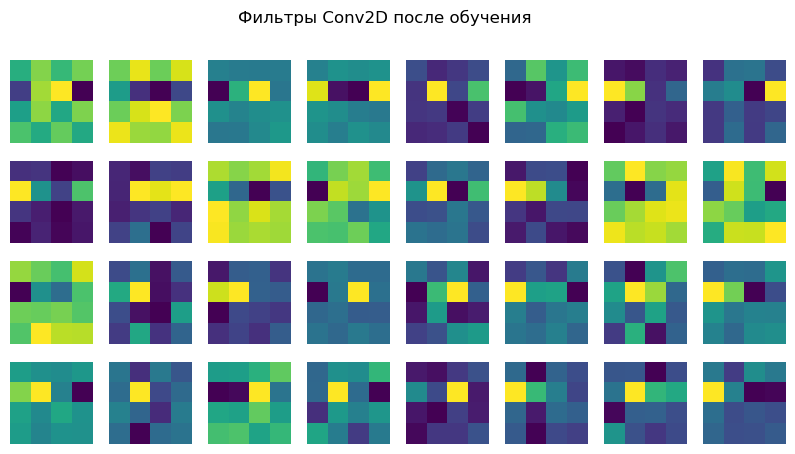

In [241]:
plt.figure(figsize=(10, 5))
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(weights_after_training[:, :, 0, i], cmap='viridis')
    plt.axis('off')
plt.suptitle('Фильтры Conv2D после обучения')
plt.show()